In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [4]:
df.describe()

,Склад,Количество
count,301355.000000,301355.000000
mean,2.900652,2.951559
std,1.352221,2.998154
min,1.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,5.000000,200.000000


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum()
grouped_df

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64

Вывести несколько первых строк сгруппированных данных

In [7]:
grouped_df = df.groupby('Дата')['Количество'].sum()
grouped_df.head(5)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

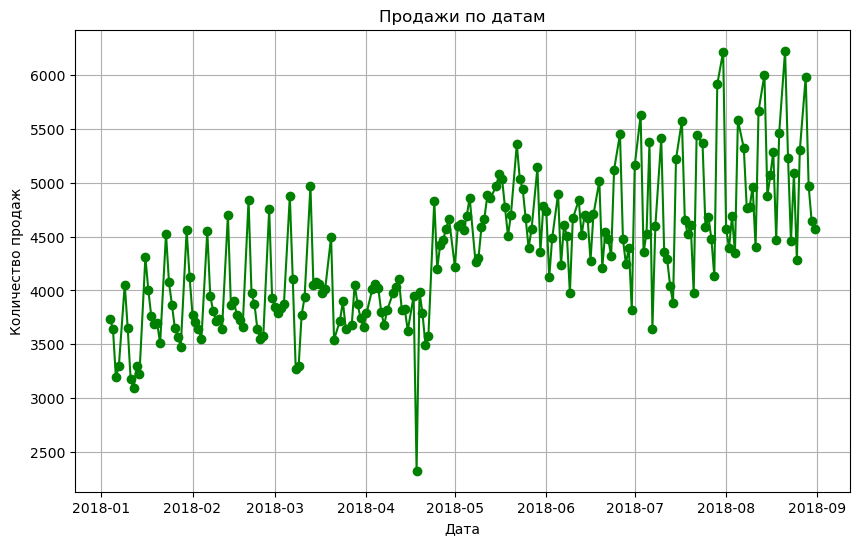

In [8]:
plt.figure(figsize=(10, 6))  
plt.plot(grouped_df, marker='o', linestyle='-',color='green') 
plt.title('Продажи по датам')  
plt.xlabel('Дата')  
plt.ylabel('Количество продаж') 
plt.xticks()  
plt.grid(True) 
plt.show()  

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
С середины 2018-03 до середины 2018-04, были низкие продажи. Примерно с 16-17 количество продаж резко снизились до минимума,затем постепенно выросли.
В среднем продажи с 2018-01 о середины 2018-03 были от 3500 до 4500, но с 2018-07 до 2018-09 продажи выросли от 4000-6000.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [9]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]
print(outliers)
higher_outliers = df[(df['Количество'] > upper_bound)]
lower_outliers = df[df['Количество'] < lower_bound]
max_outlier = higher_outliers[higher_outliers['Количество'] == higher_outliers['Количество'].max()]
print(max_outlier)
if not lower_outliers.empty:
    min_outlier = lower_outliers[lower_outliers['Количество'] == lower_outliers['Количество'].min()]
    print(f"Самый низкий выброс: {min_outlier}")
else:
    print("Выбросы ниже нижней границы отсутствуют.")

             Дата  Склад   Контрагент Номенклатура  Количество
3      2018-01-04      1    address_0    product_3          10
59     2018-01-04      1    address_3    product_6          10
142    2018-01-04      1   address_10    product_2          10
175    2018-01-04      1   address_14    product_1           9
176    2018-01-04      1   address_14    product_2          10
...           ...    ...          ...          ...         ...
301309 2018-08-31      5  address_169    product_0          10
301310 2018-08-31      5  address_169    product_1          20
301311 2018-08-31      5  address_169    product_2          15
301312 2018-08-31      5  address_169    product_3          10
301315 2018-08-31      5  address_169    product_6          15

[13140 rows x 5 columns]
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200
Выбросы ниже нижней границы отсутствуют.


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [10]:
df = df[df['Склад'] == 3]
df = df[df['Дата'].dt.dayofweek == 2]
df = df[df['Дата'].dt.month.isin([6, 7, 8])]
grouped = df.groupby('Номенклатура')['Количество'].sum()
top_product = grouped.idxmax()
print(f"Топовый товар по продажам по средам за июнь, июль, август у 3 склада: {top_product}")

Топовый товар по продажам по средам за июнь, июль, август у 3 склада: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [11]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [13]:
df_W = pd.read_excel('weather.xls')
print(df_W.head())

        Дата     T
0 2018-08-31   9.6
1 2018-08-31  11.3
2 2018-08-31  12.3
3 2018-08-31  13.2
4 2018-08-31  12.5


In [14]:
df_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Дата    1918 non-null   datetime64[ns]
 1   T       1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB


In [15]:
df_W.describe()

,Дата,T
count,1918,1918.000000
mean,2018-05-03 11:23:57.747653888,4.544630
min,2018-01-04 00:00:00,-37.700000
25%,2018-03-04 06:00:00,-9.400000
50%,2018-05-03 00:00:00,8.050000
75%,2018-07-02 18:00:00,17.600000
max,2018-08-31 00:00:00,32.800000
std,NaN,15.948546


In [16]:
df_W['Дата'] = pd.to_datetime(df_W['Дата'])

In [17]:
joint_df = pd.merge(df, df_W, on='Дата')
joint_df

,Дата,Склад,Контрагент,Номенклатура,Количество,T
0,2018-06-06,3,address_206,product_0,2,27.5
1,2018-06-06,3,address_206,product_0,2,30.6
2,2018-06-06,3,address_206,product_0,2,29.9
3,2018-06-06,3,address_206,product_0,2,29.0
4,2018-06-06,3,address_206,product_0,2,21.9
...,...,...,...,...,...,...
34755,2018-08-29,3,address_112,product_22,2,15.4
34756,2018-08-29,3,address_112,product_22,2,12.8
34757,2018-08-29,3,address_112,product_22,2,11.1
34758,2018-08-29,3,address_112,product_22,2,11.9


In [18]:
temperatures = joint_df['T']
avg_t = sum(temperatures) / len(temperatures)
print(f"Средняя температура за день: {avg_t:.1f}°C")

Средняя температура за день: 19.2°C


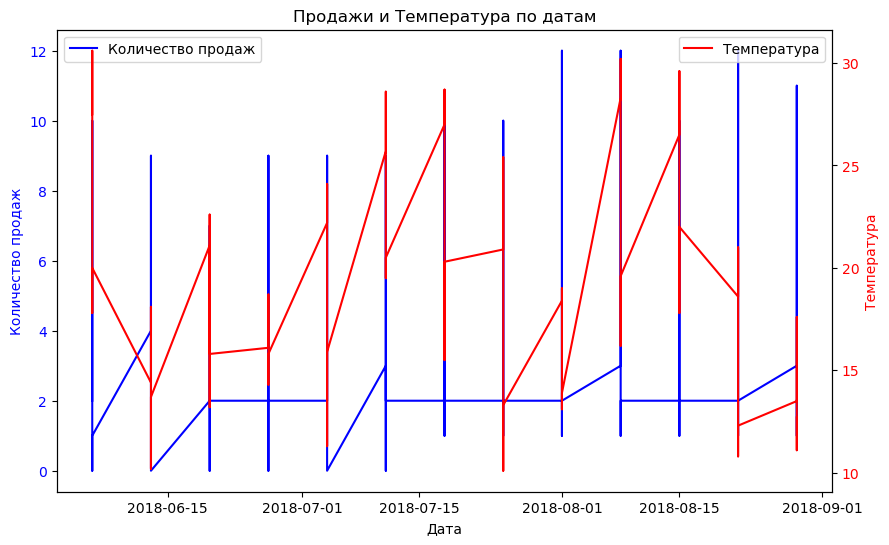

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(joint_df['Дата'], joint_df['Количество'], label='Количество продаж', color='blue')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Дата')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(joint_df['Дата'],  joint_df['T'], label='Температура', color='red')
ax2.set_ylabel('Температура', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Продажи и Температура по датам')
plt.legend()
plt.show()

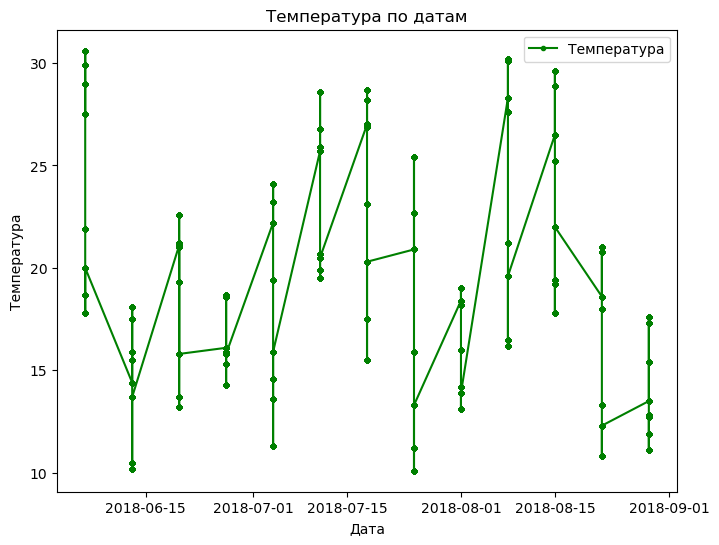

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(joint_df['Дата'], joint_df['T'], label='Температура',color='green', marker='o', markersize=3)
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Температура по датам')
plt.legend()
plt.show()